In [1]:
import matplotlib.pyplot as plt
import include.helpers as h

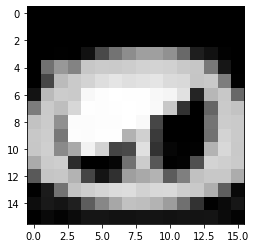

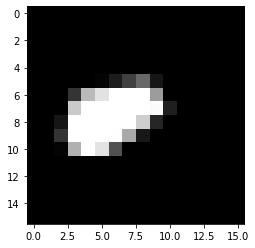

In [2]:
scaling_factor = 32

image = h.get_image("IMG-0002-00074.dcm", scaling_factor=scaling_factor)
gt_image = h.get_ground_truth_image("liver_GT_074.png", scaling_factor=scaling_factor)

# plot image
plt.imshow(image, cmap='gray')
plt.show()

# plot gt
plt.imshow(gt_image, cmap='gray')
plt.show()

In [3]:
similarity_matrix = h.build_similarity_matrix(image, use_spatial=False)

0.00%
9.77%
19.53%
29.30%
39.06%
48.83%
58.59%
68.36%
78.12%
87.89%
97.66%


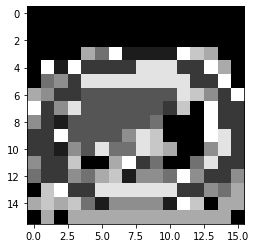

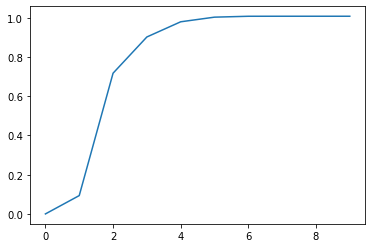

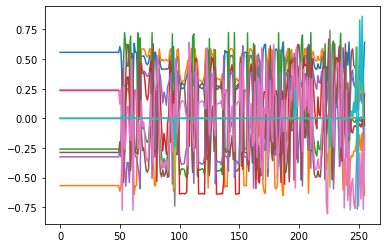

In [4]:
labels, eigenvalues, eigenvectors = h.get_spectral_clustering(similarity_matrix, n_clusters=10)

cluster_image = h.get_cluster_image(labels, image.shape)

plt.imshow(cluster_image, cmap="gray")
plt.show()

plt.plot(eigenvalues)
plt.show()
plt.plot(eigenvectors)
plt.show()

## Evaluation
1. Find the cluster that represents the liver
2. Extract the cluster
3. Compare it to the ground truth

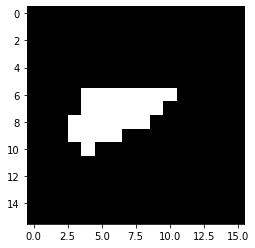

In [8]:
cluster = 3 # update this to look at a different cluster

cluster_image = h.get_cluster_image(labels, image.shape, cluster=cluster)

plt.imshow(cluster_image, cmap="gray")
plt.show()

In [14]:
jaccard, precision, sensitivity = h.get_evaluation_scores(cluster_image, gt_image)

print("Jaccard: {:.2f}".format(jaccard))
print("Precision: CLASS 0: {:.4f}, CLASS 1: {:.4f}".format(precision[0], precision[1]))
print("Sensitivity: CLASS 0: {:.4f}, CLASS 1: {:.4f}".format(sensitivity[0], sensitivity[1]))

Jaccard: 0.56
Precision: CLASS 0: 0.9267, CLASS 1: 0.9583
Sensitivity: CLASS 0: 0.9954, CLASS 1: 0.5750
